In [1]:
# general imports
import matplotlib.pyplot as plt
%matplotlib inline

# AWS imports: Import Braket SDK modules
from braket.circuits import Circuit
from braket.devices import LocalSimulator

In [2]:
bell = Circuit().h(0).cnot(control=0, target=1)

In [3]:
# set up device
device = LocalSimulator()

# run circuit
result = device.run(bell, shots=1000).result()
# get measurement shots
counts = result.measurement_counts
# print counts
print(counts)

Counter({'00': 524, '11': 476})


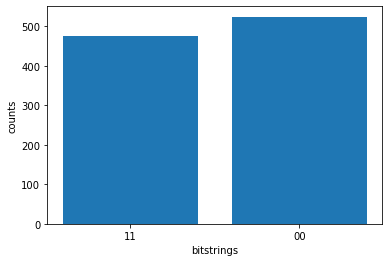

In [4]:
# plot histogram
plt.bar(counts.keys(), counts.values());
plt.xlabel('bitstrings');
plt.ylabel('counts');

## Circuit Printing


In [5]:
# define circuit with 4 qubits
my_circuit = Circuit().h(range(4))
print(my_circuit)

T  : |0|
        
q0 : -H-
        
q1 : -H-
        
q2 : -H-
        
q3 : -H-

T  : |0|


In [11]:
my_circuit=Circuit().h(0).cnot(target=1,control=0)
print(my_circuit)

T  : |0|1|
          
q0 : -H-C-
        | 
q1 : ---X-

T  : |0|1|


In [14]:
# show moments of our quantum circuit
my_moments = my_circuit.moments
for moment in my_moments:
    print(moment)
    
## first hadamard is applied then cnot

MomentsKey(time=0, qubits=QubitSet([Qubit(0)]), moment_type=<MomentType.GATE: 'gate'>, noise_index=0)
MomentsKey(time=1, qubits=QubitSet([Qubit(0), Qubit(1)]), moment_type=<MomentType.GATE: 'gate'>, noise_index=0)


## All available gates

In [17]:
# print all available gates currently available within SDK
from braket.circuits import Circuit, Gate, Instruction, circuit, Observable
import string
gate_set = [attr for attr in dir(Gate) if attr[0] in string.ascii_uppercase]
print(gate_set)

['CCNot', 'CNot', 'CPhaseShift', 'CPhaseShift00', 'CPhaseShift01', 'CPhaseShift10', 'CSwap', 'CV', 'CY', 'CZ', 'ECR', 'H', 'I', 'ISwap', 'PSwap', 'PhaseShift', 'Rx', 'Ry', 'Rz', 'S', 'Si', 'Swap', 'T', 'Ti', 'Unitary', 'V', 'Vi', 'X', 'XX', 'XY', 'Y', 'YY', 'Z', 'ZZ']


## Circuit Execution

In [18]:
# set up device
device = LocalSimulator()

# run circuit
result = device.run(my_circuit, shots=1000).result()
# get measurement shots
counts = result.measurement_counts
# print counts
print(counts)

Counter({'00': 506, '11': 494})


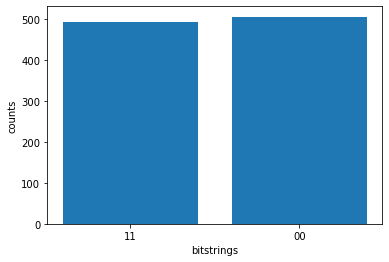

In [19]:
# plot using Counter
plt.bar(counts.keys(), counts.values());
plt.xlabel('bitstrings');
plt.ylabel('counts');